## 数据集尺寸分布

COCO分析三个段：  
1. area < 32^2  
2. 32^2 < area < 96^2  
3. area > 96^2  

我们需要分析更多的分段。  

In [16]:
%reload_ext autoreload
%autoreload 2

import os

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
data_root = '/home/xd/data/rsna/anno'
anno_filename = 'stage_2_train_labels.csv'

anno_df = pd.read_csv(os.path.join(data_root, anno_filename))

anno_df.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [3]:
targets = anno_df[anno_df['Target']==1]
targets.head(5)

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1
14,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1


In [19]:
ws = targets['width']
hs = targets['height']

area_thresholds = [32*32, 96*96, 144*144, 288*288, 432*432, 576*576, 864*864]
area_bins = [int(np.sqrt(threshold)) for threshold in area_thresholds]
areas = [w*h for w, h in zip(ws, hs)]

96-576之间占大多数（9000多个），其中144-432之间又占了大多数（8000多个），尺寸还是比较均衡的。  
要注意原图尺寸是1024*1024。  
不过对于Val来说，计算出来的尺寸依然是放大到1024尺寸的。  

(array([8.600e+01, 7.060e+02, 5.211e+03, 3.144e+03, 4.060e+02, 2.000e+00]),
 array([  1024,   9216,  20736,  82944, 186624, 331776, 746496]),
 <a list of 6 Patch objects>)

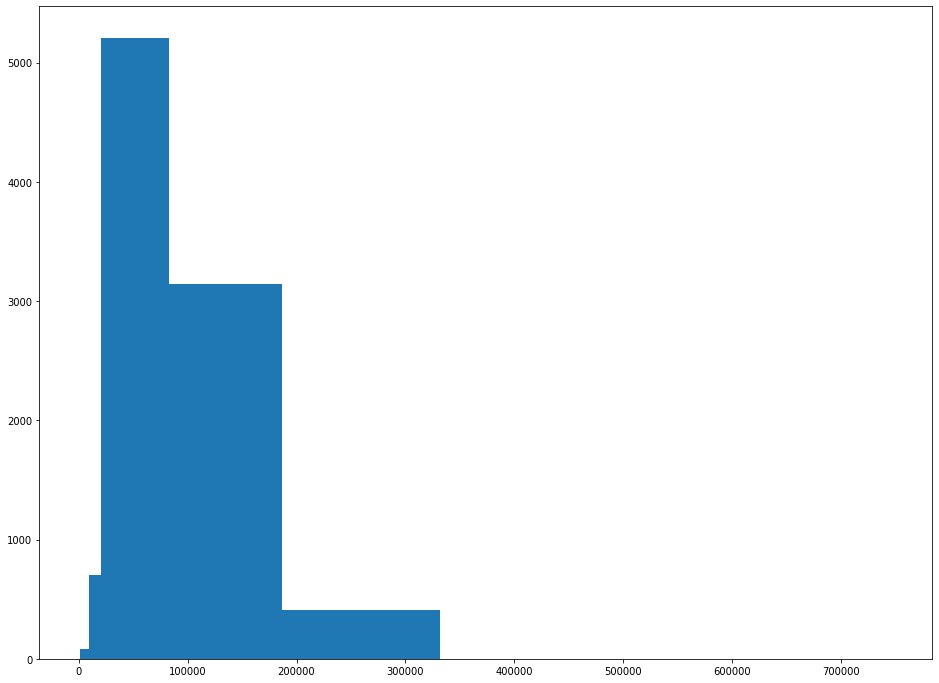

In [30]:
plt.figure(figsize=(16, 12))
plt.hist(areas, bins=area_thresholds)